In [2]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML

In [8]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

plt.show()

<Figure size 800x800 with 1 Axes>

In [9]:
lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

In [10]:
# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

In [11]:
# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

In [38]:
# Y entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 38us/sample - loss: 0.0237 - acc: 1.0000
Epoch 2/100
500/500 [==============================] - 0s 36us/sample - loss: 0.0229 - acc: 1.0000
Epoch 3/100
500/500 [==============================] - 0s 34us/sample - loss: 0.0222 - acc: 1.0000
Epoch 4/100
500/500 [==============================] - 0s 34us/sample - loss: 0.0214 - acc: 1.0000
Epoch 5/100
500/500 [==============================] - 0s 34us/sample - loss: 0.0208 - acc: 1.0000
Epoch 6/100
500/500 [==============================] - 0s 36us/sample - loss: 0.0201 - acc: 1.0000
Epoch 7/100
500/500 [==============================] - 0s 34us/sample - loss: 0.0195 - acc: 1.0000
Epoch 8/100
500/500 [==============================] - 0s 34us/sample - loss: 0.0189 - acc: 1.0000
Epoch 9/100
500/500 [==============================] - 0s 36us/sample - loss: 0.0183 - acc: 1.0000
Epoch 10/100
500/500 [==============================] - 0s 36us/sample - loss: 0.0178 - acc: 1.0000
Epoch 11/

500/500 [==============================] - 0s 38us/sample - loss: 0.0045 - acc: 1.0000
Epoch 84/100
500/500 [==============================] - 0s 42us/sample - loss: 0.0044 - acc: 1.0000
Epoch 85/100
500/500 [==============================] - 0s 44us/sample - loss: 0.0044 - acc: 1.0000
Epoch 86/100
500/500 [==============================] - 0s 42us/sample - loss: 0.0043 - acc: 1.0000
Epoch 87/100
500/500 [==============================] - 0s 42us/sample - loss: 0.0043 - acc: 1.0000
Epoch 88/100
500/500 [==============================] - 0s 40us/sample - loss: 0.0042 - acc: 1.0000
Epoch 89/100
500/500 [==============================] - 0s 38us/sample - loss: 0.0042 - acc: 1.0000
Epoch 90/100
500/500 [==============================] - 0s 40us/sample - loss: 0.0041 - acc: 1.0000
Epoch 91/100
500/500 [==============================] - 0s 38us/sample - loss: 0.0041 - acc: 1.0000
Epoch 92/100
500/500 [==============================] - 0s 38us/sample - loss: 0.0040 - acc: 1.0000
Epoch 93/100


In [50]:
# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)


_pY = model.predict_classes(_pX).reshape((res, res))

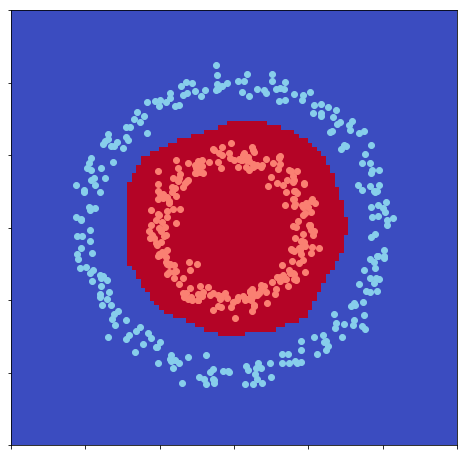

In [51]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)    

plt.show()